In [0]:
import pandas as pd
import sklearn.metrics as sm
import sklearn.linear_model as slm
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def rate_model(model, x, y):
    f = model.predict(x)
    res = {}
    res["MAE"] = sm.mean_absolute_error(y, f)
    res["RMSE"] = sm.mean_squared_error(y, f) ** 0.5
    res["MPE"] = sum((yi - fi) / yi for yi, fi in zip(y, f)) / len(x) * 100
    res["MAPE"] = sum(abs(yi - fi) / yi for yi, fi in zip(y, f)) / len(x) * 100
    y_avg =sum(y) / len(x)
    res["AD"] = sum(abs(fi - y_avg) for fi in f)
    res["MAD"] = res["AD"] / len(x)
    res["R2"] = sm.r2_score(y, f)
    res["THEIL"] = (sum((yi - fi) ** 2 for yi, fi in zip(y, f)) / sum(yi ** 2 + fi ** 2 for yi, fi in zip(y, f))) ** 0.5
    for k, v in res.items():
        print(f"{k:s}: {v:.2f}")
    return res

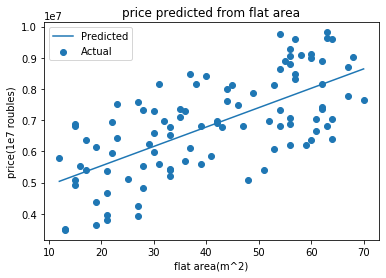

MAE: 990261.94
RMSE: 1141985.13
MPE: -3.30
MAPE: 15.69
AD: 91939101.21
MAD: 919391.01
R2: 0.45
THEIL: 0.12


In [0]:
df = pd.read_csv("https://gist.githubusercontent.com/rprtr258/6432740b03b12a34df91ac5e1655cf14/raw/92a185d069e498dba7e694473dc0165c99fbb56e/2.csv")

model = slm.LinearRegression()
X = np.array(df[["SQUARE_METERS"]])
Y = np.array(df["PRICE"])
model.fit(X, Y)
a, b = model.coef_[0], model.intercept_

plt.scatter(X, Y)
X = np.linspace(X.min(), X.max())
plt.plot(X, model.predict(X.reshape(-1, 1)))
plt.legend(["Predicted", "Actual"])
plt.title("price predicted from flat area")
plt.xlabel("flat area(m^2)")
plt.ylabel("price(1e7 roubles)")
plt.show()

X = np.array(df[["SQUARE_METERS"]])
Y = np.array(df["PRICE"])
res1 = rate_model(model, X, Y)

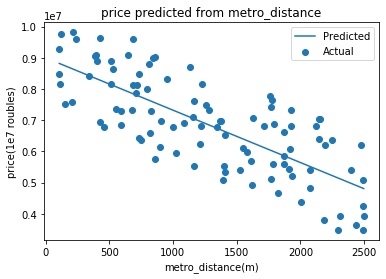

MAE: 870605.16
RMSE: 1002814.03
MPE: -2.57
MAPE: 13.78
AD: 101989176.67
MAD: 1019891.77
R2: 0.58
THEIL: 0.10


In [0]:
df = pd.read_csv("https://gist.githubusercontent.com/rprtr258/6432740b03b12a34df91ac5e1655cf14/raw/92a185d069e498dba7e694473dc0165c99fbb56e/1.csv")

model = slm.LinearRegression()
X = np.array(df[["METRO_DISTANCE"]])
Y = np.array(df["PRICE"])
model.fit(X, Y)
a, b = model.coef_[0], model.intercept_

plt.scatter(X, Y)
X = np.linspace(X.min(), X.max())
plt.plot(X, model.predict(X.reshape(-1, 1)))
plt.legend(["Predicted", "Actual"])
plt.title("price predicted from metro_distance")
plt.xlabel("metro_distance(m)")
plt.ylabel("price(1e7 roubles)")
plt.show()

X = np.array(df[["METRO_DISTANCE"]])
Y = np.array(df["PRICE"])
res2 = rate_model(model, X, Y)

In [0]:
df = pd.read_csv("https://gist.githubusercontent.com/rprtr258/6432740b03b12a34df91ac5e1655cf14/raw/92a185d069e498dba7e694473dc0165c99fbb56e/3.csv")

model = slm.LinearRegression()
X = np.array(df[["METRO_DISTANCE", "SQUARE_METERS"]])
Y = np.array(df["PRICE"])
model.fit(X, Y)

X = np.array(df[["METRO_DISTANCE", "SQUARE_METERS"]])
Y = np.array(df["PRICE"])
res3 = rate_model(model, X, Y)

MAE: 188069.84
RMSE: 231660.84
MPE: -0.13
MAPE: 2.85
AD: 121653918.61
MAD: 1216539.19
R2: 0.98
THEIL: 0.02
